In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import sys
sys.path.append('../')

from intersections_and_roads import *

In [28]:
street_centerlines = gpd.read_file('./San_Francisco_Basemap_Street_Centerlines_min.json')
street_centerlines_csv = pd.read_csv('./San_Francisco_Basemap_Street_Centerlines.csv')

In [85]:
street_centerlines_csv.head()
street_centerlines_csv['id'] = range(street_centerlines_csv.shape[0])

In [94]:
street_centerlines_csv['ToNode'] = street_centerlines_csv['t_node_cnn']
street_centerlines_csv['FromNode'] = street_centerlines_csv['f_node_cnn']

In [95]:
street_centerlines_csv.head()

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,streetname,street_gc,st_type,t_node_cnn,zip_code,geometry,multigeom,id,ToNode,FromNode
0,N,0,15145000,15145000,NaN,26132000,NaN,PRIVATE,0,0,...,CROWN CT,CROWN,CT,54223000,94114,LINESTRING (-122.44694244517986 37.75722892152...,False,0,54223000,26132000
1,Y,0,11305001,11305001,NaN,26255000,DPW,UPROW,1,37,...,SAINT GERMAIN AVE,SAINT GERMAIN,AVE,54224000,94114,LINESTRING (-122.44791526561579 37.75758949801...,False,1,54224000,26255000
2,Y,5,11305002,11305002,NaN,54224000,DPW,STREETS,39,99,...,SAINT GERMAIN AVE,SAINT GERMAIN,AVE,26247000,94114,LINESTRING (-122.4488770135246 37.757536327477...,False,2,26247000,54224000
3,Y,5,13798000,13798000,NaN,35015000,DPW,STREETS,221,299,...,CORONA ST,CORONA,ST,35015000,94127,LINESTRING (-122.46659772741017 37.72592447531...,False,3,35015000,35015000
4,N,5,5389001,5389001,NaN,35016000,DPW,STREETS,0,0,...,FAIRFAX AVE,FAIRFAX,AVE,35017000,94124,LINESTRING (-122.38085080355044 37.73627938470...,False,4,35017000,35016000


In [72]:
names = street_centerlines_csv.filter('street', like='MINNA')

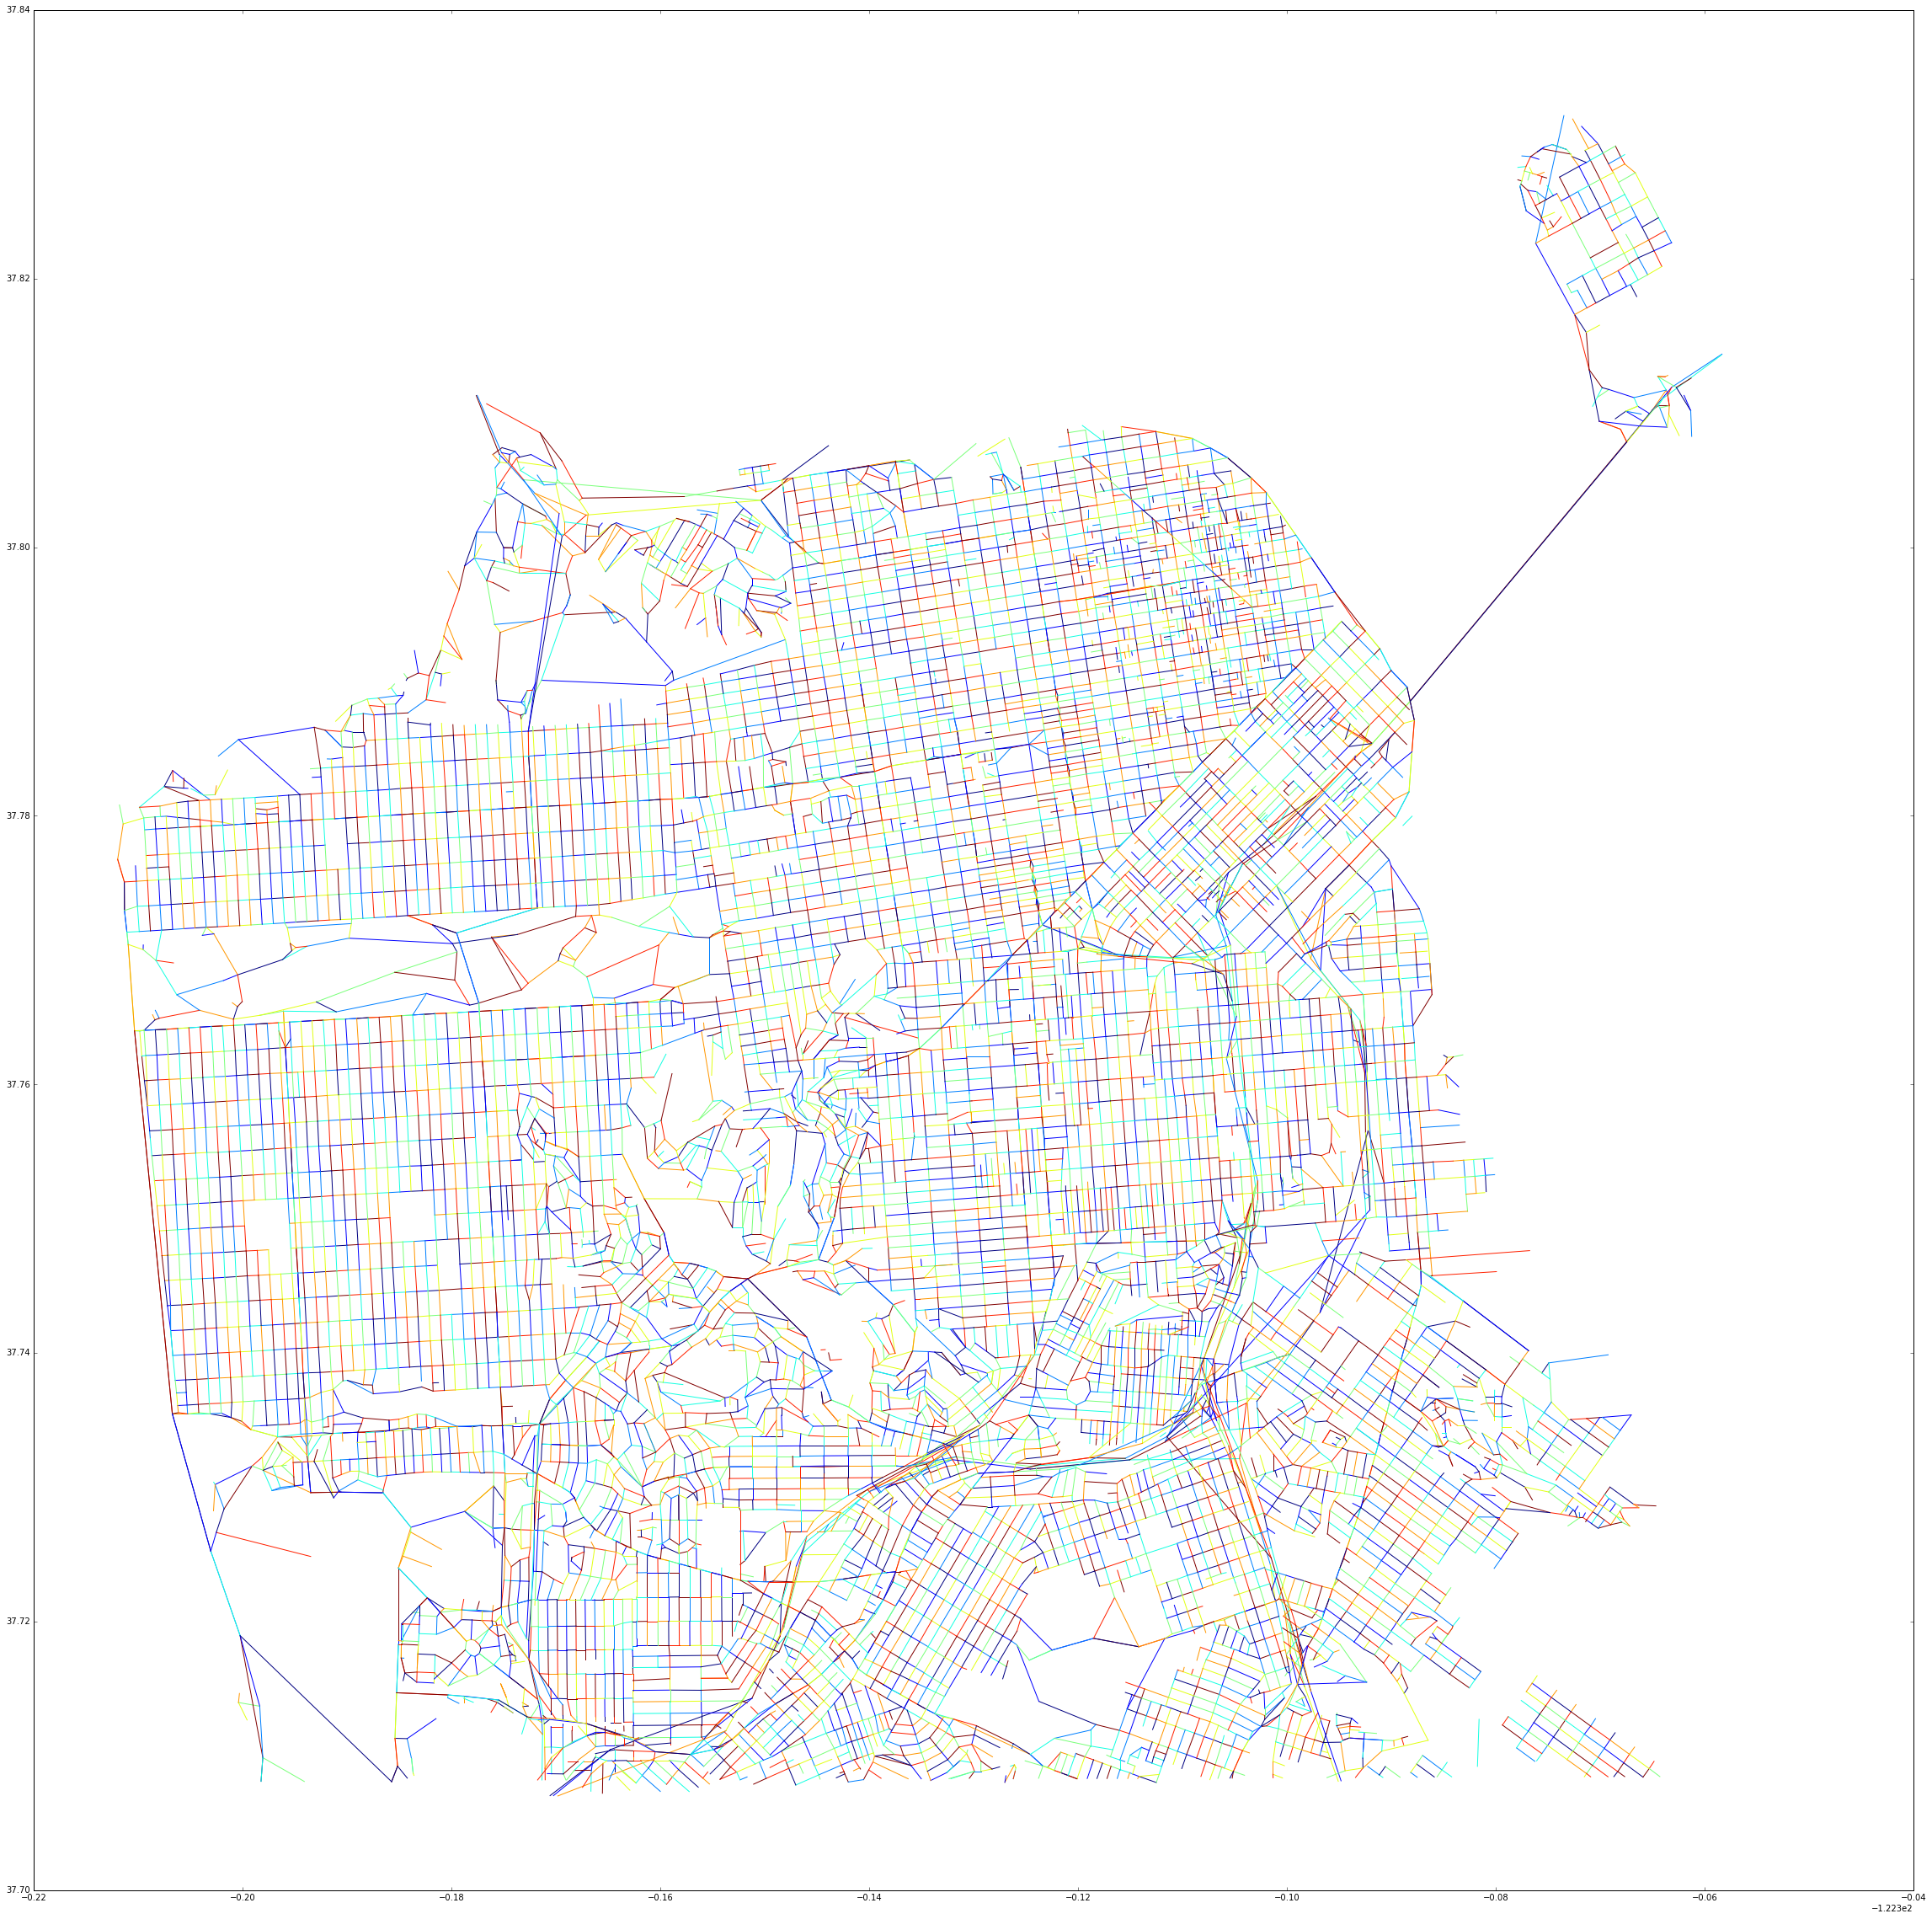

In [26]:
fig, ax = plt.subplots(1,1, figsize=(40,40))
street_centerlines.plot(ax=ax)

In [21]:
intersections = pd.read_csv('./List_of_Streets_and_Intersections.csv')

In [79]:
print intersections.shape
print len(intersections['CNN'].unique())

(34675, 15)
25866


In [87]:
intersections.head(10)
intersections['id'] = range(intersections.shape[0])

In [93]:
intersections['NodeNumber'] = intersections['CNN']
intersections.head()

,CNN,streetname,from_st,to_st,cardinal,addrange,limits,location,theOrder,LF_FADD,RT_FADD,LF_TADD,RT_TADD,FROM_CNN,TO_CNN,id,NodeNumber
0,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,30731000
1,100000,01ST ST,BUSH ST \ MARKET ST,STEVENSON ST,NaN,1 - 34,BUSH ST \ MARKET ST to STEVENSON ST (1 - 34),NaN,2,1.0,2.0,19.0,34.0,30731000.0,24666000.0,1,100000
2,24666000,01ST ST,STEVENSON ST,NaN,NaN,NaN,STEVENSON ST intersection,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,2,24666000
3,101000,01ST ST,STEVENSON ST,JESSIE ST,NaN,21 - 56,STEVENSON ST to JESSIE ST (21 - 56),NaN,4,21.0,36.0,47.0,56.0,24666000.0,24564000.0,3,101000
4,24564000,01ST ST,JESSIE ST,NaN,NaN,NaN,JESSIE ST intersection,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,4,24564000


In [100]:
intersection_graph, connection_dict = build_intersection_graph(intersections, street_centerlines_csv)

AttributeError: ("'Series' object has no attribute 'P_X'", u'occurred at index 0')